# **Trained Predictive Systems — Melbourne House Price Estimation 2018**

The present work is based on the dataset of the following Kaggle's link: <br>
https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv

By [Tony Pino](https://www.kaggle.com/anthonypino)

# Table of content:

- [Table of content:](#table-of-content)  <br>
        - [**Hypothesis**](#hypothesis)  <br>
        - [**Objective**](#objective) <br>
        - [**Usability**](#usability) <br>
            - [**Target Audience**](#target-audience) <br>
            - [**Limitations**](#limitations) <br>
- [**EXPLORATORY ANALYSIS**](#exploratory-analysis) <br>
        - [**Preparations and data import**](#preparations-and-data-import) <br>
        - [**EDA (Exploratory Data Analysis)**](#eda-exploratory-data-analysis) <br>
            - [**Cleaning & Feature Engineering**](#cleaning-feature-engineering) <br>
            - [Outlier handling (IQR) — for analysis-friendly distributions](#outlier-handling-iqr-for-analysis-friendly-distributions) <br>
    - [**Post-cleaning EDA snapshots (boxplot + scatter)**](#post-cleaning-eda-snapshots-boxplot-scatter) <br>
    - [**MACHINE LEARNING**](#machine-learning) <br>
        - [**ML models compare**](#ml-models-compare) <br>
    - [**FINAL SIMULATION**](#final-simulation) <br>

This dataset has 21 columns and 34858 rows (including titles), among which we can highlight the following: <br>

* Suburb
* Address
* Rooms (total)
* Type (Ex. rooms rent, house, flats...)
* Price (AUD)
* Method (purchase, transfer...)
* SellerG (Real State Agent)
* Date (sell date)
* CBD (Distance from city centre - km)
* Postcode
* Bedroom2 (without main beedroom)
* Bathroom
* Car (parking)
* Landsize (m2)
* BuildingArea (m2)
* YearBuil
* CouncilArea
* Lattitude
* Longtitude
* Regionname
* Propertycount (number of homeowners in the suburn)

**Definitions has been obtained from the source dataset.**

### **Hypothesis**






There is a direct relationship between the landsize (m2) and the price.

### **Objective**


To be able to predict the sale value of a Melbourne property, including the support of Machine Learning Tools.

### **Usability**

The present work will allow us to determine the value of the property in Melbourne.

#### **Target Audience**

* Any person or entity in Melbourne who wishes to mortgage his or her home.
* Any person or entity in Melbourne who wishes to buy or sell a home.

*1 All analyses are marked within the limitations mentioned in the following subheading.

#### **Limitations**

*   This work is limited to the study of housing values in Melbourne - Australia, with data up to August 2018. (Dataset created by Tony Pino - https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market).
*   This study is intended for educational purposes only.
*   The dataset is trained and uses only 2018 data, so it is important to consider that prices change over time.
*   Machine Learning work will comprise from 9km away from the City Centre in Western Victoria, Eastern Victoria and Northern Metropolitan regions; this will be justified and detailed later.
*   Ridge Regression with one-hot encoding for Type and Suburb, using log(Price) target.
*   With current data (maintaining the structure), the model can be updated to provide the most accurate estimates.



# **EXPLORATORY ANALYSIS**

### **Preparations and data import**

In [1]:
# ===============================
# Install Required Packages
# ===============================
!pip install -q scikit-learn pandas numpy matplotlib seaborn plotly ipywidgets scipy

# ===============================
# Core Libraries
# ===============================
import numpy as np
import pandas as pd
import math
import warnings
import timeit
from numpy import random

# ===============================
# Visualization Libraries
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ===============================
# Scikit-Learn - Model Selection & Metrics
# ===============================
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    f1_score
)

# ===============================
# Scikit-Learn - Preprocessing
# ===============================
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# ===============================
# Scikit-Learn - Regression Models
# ===============================
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# ===============================
# Scikit-Learn - Classification Models
# ===============================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# ===============================
# Scikit-Learn - Clustering
# ===============================
from sklearn.cluster import AgglomerativeClustering, Birch
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
from scipy import stats

# ===============================
# Widgets (for interactive notebooks)
# ===============================
import ipywidgets as widgets
from ipywidgets import HBox, VBox

# ===============================
# Global Settings
# ===============================
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")

In [2]:
# Raw URL of the CSV file on GitHub
DATASET_URL = "https://raw.githubusercontent.com/JoseChirif/2018-House-Price-Estimation---Melbourne-Australia/refs/heads/main/Data/Melbourne_housing_FULL.csv"
melb_df = pd.read_csv(DATASET_URL)

print("Shape:", melb_df.shape)
melb_df.head()

Shape: (34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# I get the headings (to guide me more easily)
for column in melb_df:
  print(column)

Suburb
Address
Rooms
Type
Price
Method
SellerG
Date
Distance
Postcode
Bedroom2
Bathroom
Car
Landsize
BuildingArea
YearBuilt
CouncilArea
Lattitude
Longtitude
Regionname
Propertycount


### **EDA (Exploratory Data Analysis)**

In [4]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
#I check the number of rows
Initial_data_number = len(melb_df)
Initial_data_number

34857

In [6]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
# Missing values (%) — top columns
missing_pct = (melb_df.isna().mean() * 100).sort_values(ascending=False)
missing_pct.head(25)

,0
BuildingArea,60.576068
YearBuilt,55.386293
Landsize,33.881286
Car,25.039447
Bathroom,23.599277
Bedroom2,23.573457
Lattitude,22.882061
Longtitude,22.882061
Price,21.832057
Regionname,0.008607


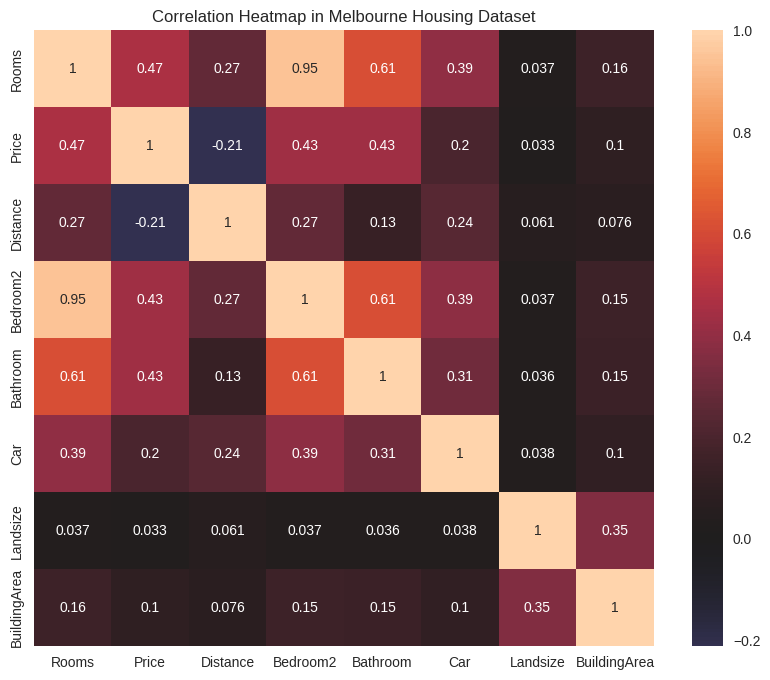

In [8]:
# Correlation Heatmap

# Create the correlation matrix with the desired variables
corrmat = melb_df[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']].corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, center=0)

# Set the title of the plot
plt.title("Correlation Heatmap in Melbourne Housing Dataset")

# Show the plot
plt.show()

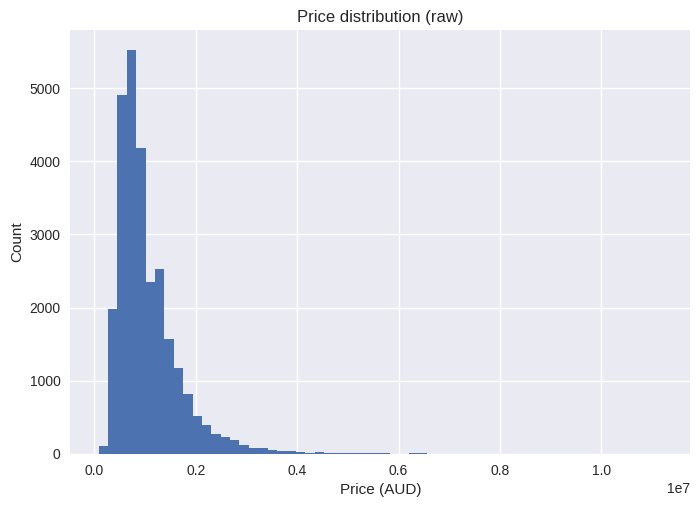

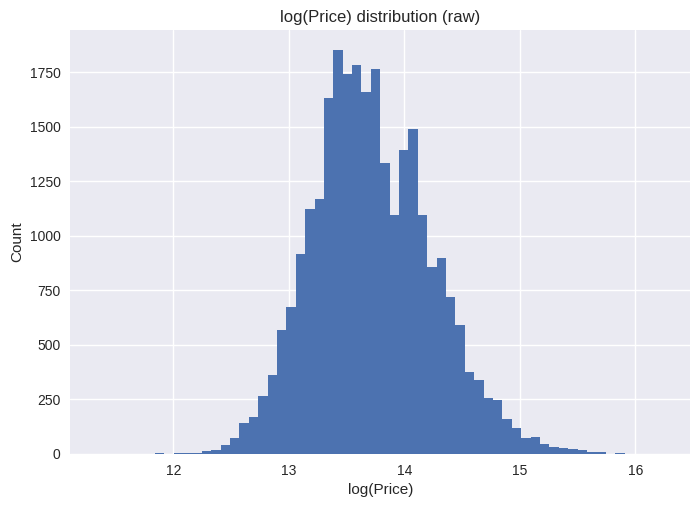

In [9]:
# Target distribution: Price (raw) and log(Price)
price = melb_df["Price"].dropna()

plt.figure()
plt.hist(price, bins=60)
plt.title("Price distribution (raw)")
plt.xlabel("Price (AUD)")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.hist(np.log(price), bins=60)
plt.title("log(Price) distribution (raw)")
plt.xlabel("log(Price)")
plt.ylabel("Count")
plt.show()


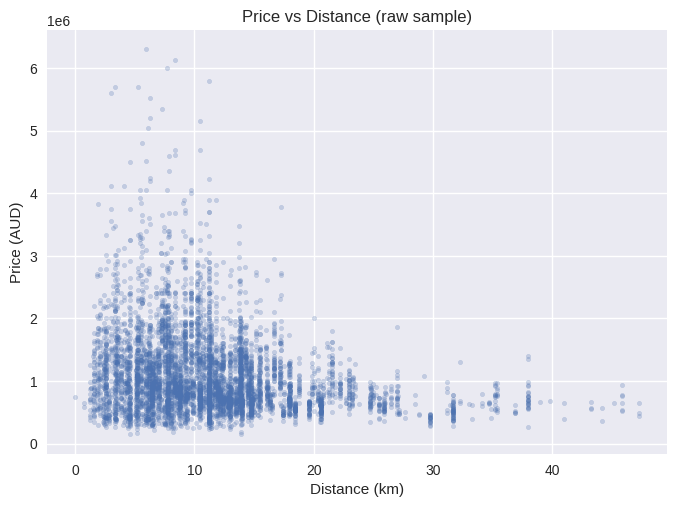

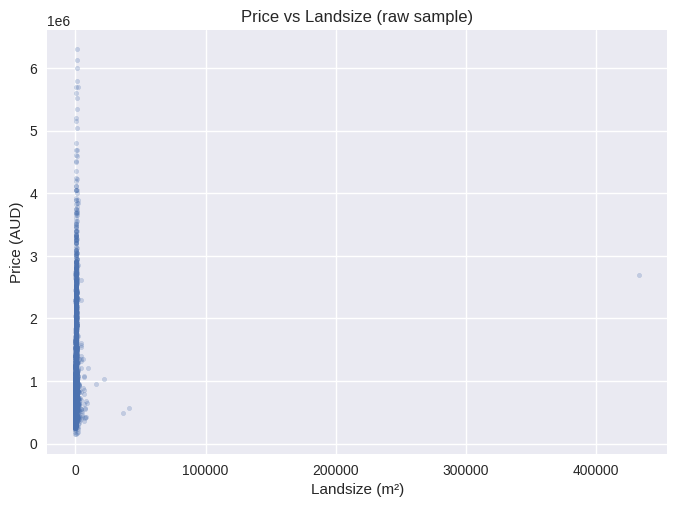

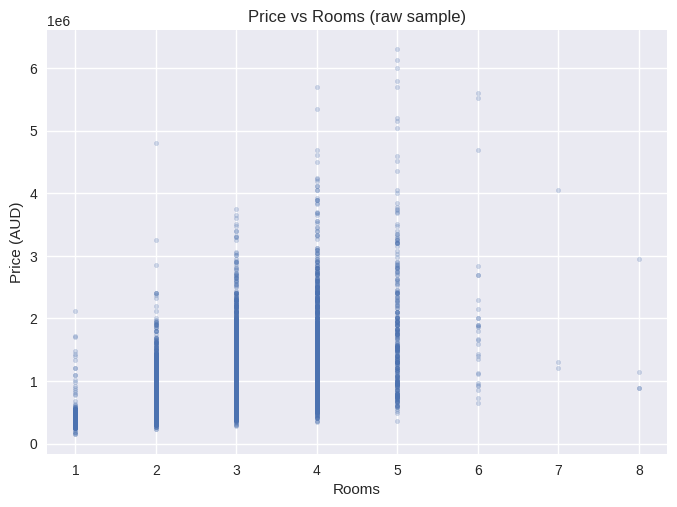

In [10]:
# Broader exploratory scatter relationships (raw sample, unfiltered)
needed = ["Price", "Distance", "Landsize", "Rooms", "Bathroom", "Car"]
sample = melb_df.dropna(subset=needed).sample(n=min(6000, len(melb_df.dropna(subset=needed))), random_state=42)

plt.figure()
plt.scatter(sample["Distance"], sample["Price"], s=10, alpha=0.25)
plt.title("Price vs Distance (raw sample)")
plt.xlabel("Distance (km)")
plt.ylabel("Price (AUD)")
plt.show()

plt.figure()
plt.scatter(sample["Landsize"], sample["Price"], s=10, alpha=0.25)
plt.title("Price vs Landsize (raw sample)")
plt.xlabel("Landsize (m²)")
plt.ylabel("Price (AUD)")
plt.show()

plt.figure()
plt.scatter(sample["Rooms"], sample["Price"], s=10, alpha=0.25)
plt.title("Price vs Rooms (raw sample)")
plt.xlabel("Rooms")
plt.ylabel("Price (AUD)")
plt.show()

I can evidence outliers in landsize 0 (an impossible measure)

In [11]:
melb_df = melb_df[melb_df['Landsize'] > 10]

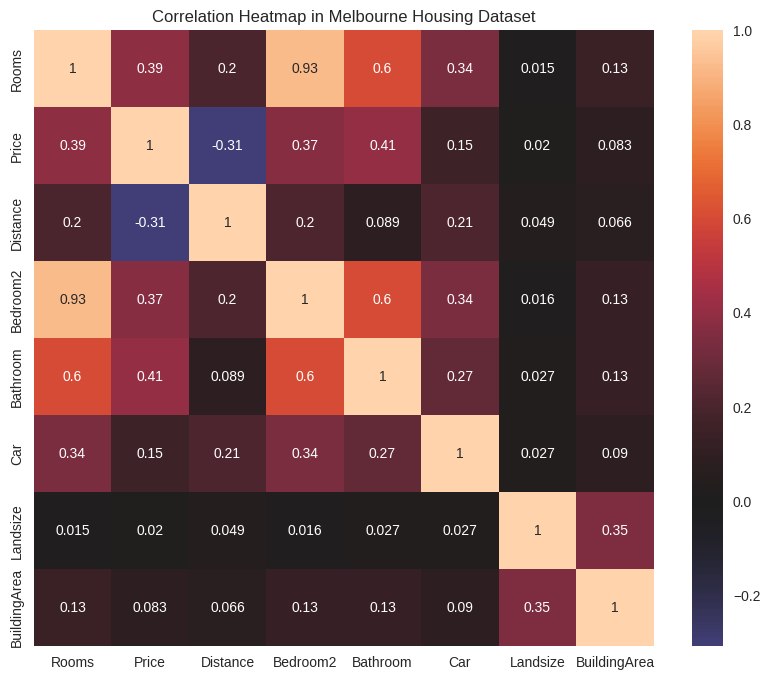

In [12]:
# Correlation Heatmap

# Create the correlation matrix with the desired variables
corrmat = melb_df[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']].corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, center=0)

# Set the title of the plot
plt.title("Correlation Heatmap in Melbourne Housing Dataset")

# Show the plot
plt.show()

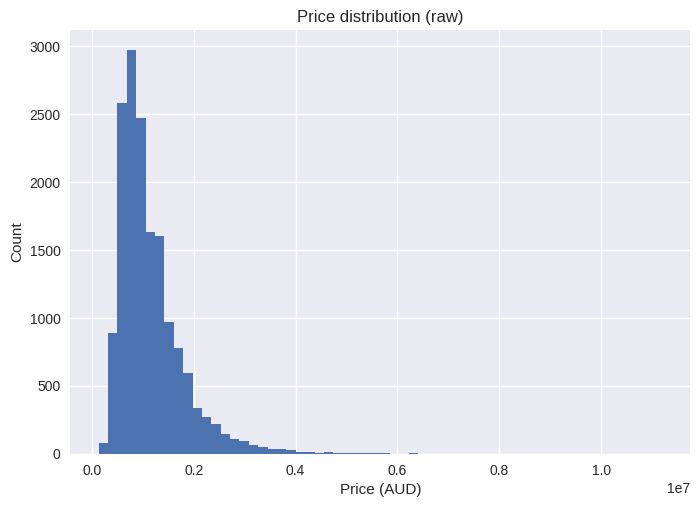

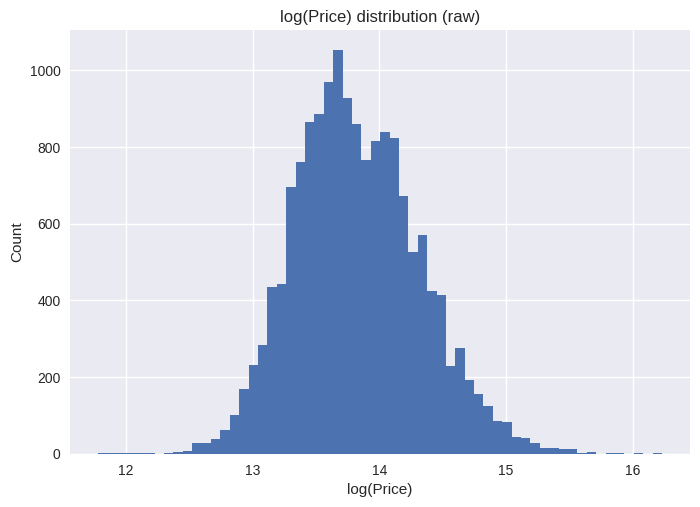

In [13]:
# Target distribution: Price (raw) and log(Price)
price = melb_df["Price"].dropna()

plt.figure()
plt.hist(price, bins=60)
plt.title("Price distribution (raw)")
plt.xlabel("Price (AUD)")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.hist(np.log(price), bins=60)
plt.title("log(Price) distribution (raw)")
plt.xlabel("log(Price)")
plt.ylabel("Count")
plt.show()

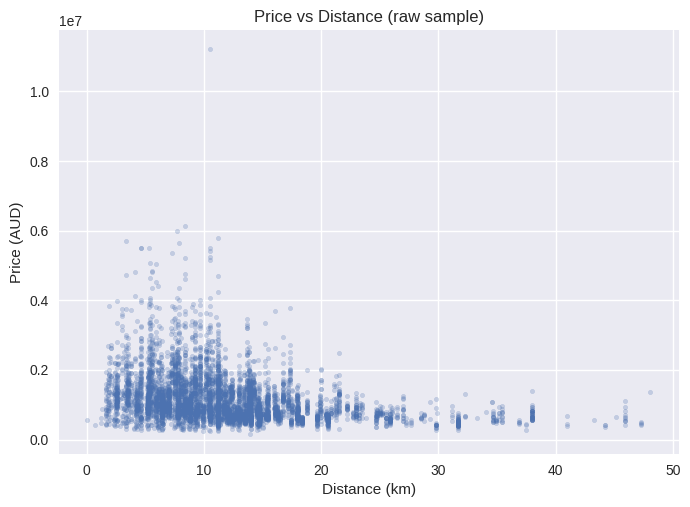

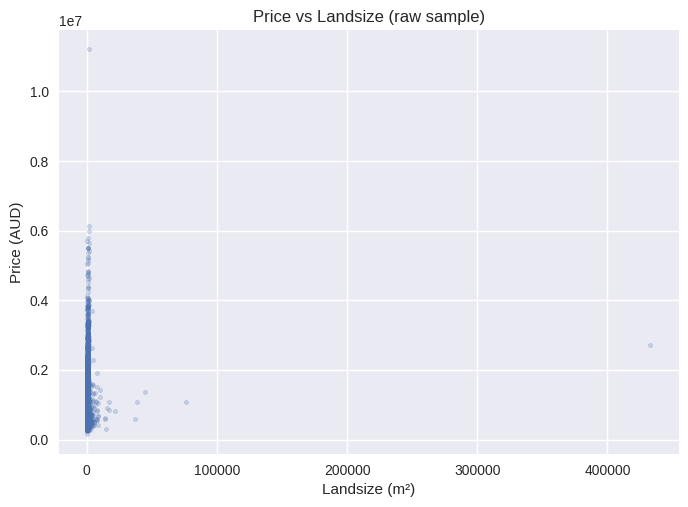

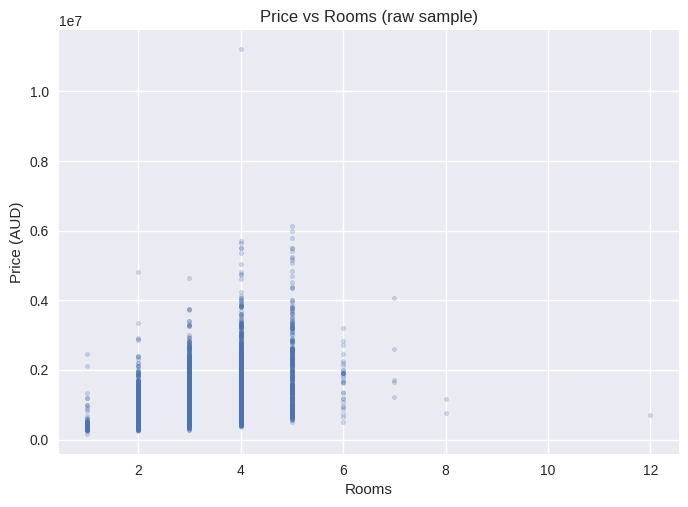

In [14]:
# Broader exploratory scatter relationships (raw sample, unfiltered)
needed = ["Price", "Distance", "Landsize", "Rooms", "Bathroom", "Car"]
sample = melb_df.dropna(subset=needed).sample(n=min(6000, len(melb_df.dropna(subset=needed))), random_state=42)

plt.figure()
plt.scatter(sample["Distance"], sample["Price"], s=10, alpha=0.25)
plt.title("Price vs Distance (raw sample)")
plt.xlabel("Distance (km)")
plt.ylabel("Price (AUD)")
plt.show()

plt.figure()
plt.scatter(sample["Landsize"], sample["Price"], s=10, alpha=0.25)
plt.title("Price vs Landsize (raw sample)")
plt.xlabel("Landsize (m²)")
plt.ylabel("Price (AUD)")
plt.show()

plt.figure()
plt.scatter(sample["Rooms"], sample["Price"], s=10, alpha=0.25)
plt.title("Price vs Rooms (raw sample)")
plt.xlabel("Rooms")
plt.ylabel("Price (AUD)")
plt.show()

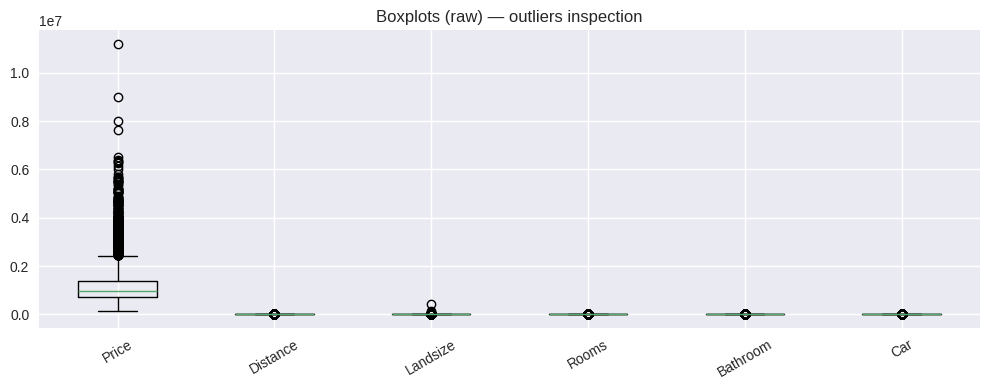

In [15]:
# Boxplots help visualize outliers in numeric features.
box_cols = ["Price", "Distance", "Landsize", "Rooms", "Bathroom", "Car"]
box_df = melb_df[box_cols].dropna()

plt.figure(figsize=(10, 4))
plt.boxplot([box_df[c].values for c in box_cols], labels=box_cols, showfliers=True)
plt.title("Boxplots (raw) — outliers inspection")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [16]:
Region_housing = melb_df['Regionname'].value_counts()
fig = px.pie(values=Region_housing,
             title="Piechart of housing distribution by region",
             names=Region_housing.index)
fig.update_traces(textinfo='percent+label')

#### **Cleaning & Feature Engineering**

Dataset and core variables:

- Numeric: Rooms, Bathroom, Car, Distance, Landsize
- Categorical: Type, Suburb
- Target: Price

I also create:

- DistanceRange using 3km bins (right=False) as in the original notebook logic.
- LogPrice for regression stability.
- A derived classification label PriceTierHigh (median split) to compute F1-score responsibly.

In [17]:
NUM_FEATURES = ["Rooms", "Bathroom", "Car", "Distance", "Landsize"]
CAT_FEATURES = ["Type", "Suburb"]
TARGET = "Price"

# Keep required columns (Regionname used for sorting/bins as in the original work)
cols_needed = NUM_FEATURES + CAT_FEATURES + [TARGET, "Regionname"]
df = melb_df[cols_needed].copy()

# Coerce numeric safely
for c in NUM_FEATURES + [TARGET]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print("Before cleaning:", df.shape)
df.head()

Before cleaning: (20602, 9)


,Rooms,Bathroom,Car,Distance,Landsize,Type,Suburb,Price,Regionname
0,2,1.0,1.0,2.5,126.0,h,Abbotsford,NaN,Northern Metropolitan
1,2,1.0,1.0,2.5,202.0,h,Abbotsford,1480000.0,Northern Metropolitan
2,2,1.0,0.0,2.5,156.0,h,Abbotsford,1035000.0,Northern Metropolitan
4,3,2.0,0.0,2.5,134.0,h,Abbotsford,1465000.0,Northern Metropolitan
5,3,2.0,1.0,2.5,94.0,h,Abbotsford,850000.0,Northern Metropolitan


In [18]:
# Basic validity filters
df = df.dropna(subset=[TARGET]).copy()
df = df[df[TARGET] > 0].copy()

# Keep non-negative for these numeric features (if NaN, we'll impute later)
df = df[df["Distance"].isna() | (df["Distance"] >= 0)].copy()
df = df[df["Landsize"].isna() | (df["Landsize"] >= 0)].copy()

# Practical cap to reduce extreme landsize scale for analysis/model stability
LANDSIZE_CAP = 5000
df = df[df["Landsize"].isna() | (df["Landsize"] <= LANDSIZE_CAP)].copy()

print("After basic filters:", df.shape)

After basic filters: (15952, 9)


In [19]:
# DistanceRange (3km bins) + sorting + 9km constraint
Distances = df["Distance"].dropna()
bins_range = range(math.floor(Distances.min()), int(df["Distance"].max()) + 3, 3)
labels_range = [f"{i}-{i+3}" for i in list(bins_range)[:-1]]

df["DistanceRange"] = pd.cut(df["Distance"], bins=bins_range, labels=labels_range, right=False)

# Sort by Region then Distance (as original notebook)
df = df.sort_values(by=["Regionname", "Distance"]).reset_index(drop=True)

# 9km constraint: remove 0–9km bins
df = df[~df["DistanceRange"].astype(str).isin({"0-3", "3-6", "6-9"})].copy()

df[["Distance", "DistanceRange", "Regionname"]].head(10)

,Distance,DistanceRange,Regionname
231,9.0,9-12,Eastern Metropolitan
232,9.0,9-12,Eastern Metropolitan
233,9.0,9-12,Eastern Metropolitan
234,9.0,9-12,Eastern Metropolitan
235,9.0,9-12,Eastern Metropolitan
236,9.0,9-12,Eastern Metropolitan
237,9.0,9-12,Eastern Metropolitan
238,9.0,9-12,Eastern Metropolitan
239,9.0,9-12,Eastern Metropolitan
240,9.0,9-12,Eastern Metropolitan


#### Outlier handling (IQR) — for analysis-friendly distributions

In [20]:
def remove_outliers_iqr(df_: pd.DataFrame, column: str, k: float = 1.5) -> pd.DataFrame:
    s = df_[column].dropna()
    if s.empty:
        return df_
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    if not np.isfinite(iqr) or iqr <= 0:
        return df_
    lo = q1 - k * iqr
    hi = q3 + k * iqr
    return df_.loc[(df_[column].isna()) | ((df_[column] >= lo) & (df_[column] <= hi))].copy()

df_clean = df.copy()
for col in ["Price", "Distance", "Landsize"]:
    df_clean = remove_outliers_iqr(df_clean, col, k=1.5)

print("After IQR cleaning (analysis copy):", df_clean.shape)

After IQR cleaning (analysis copy): (8667, 10)


## **Post-cleaning EDA snapshots (boxplot + scatter)**

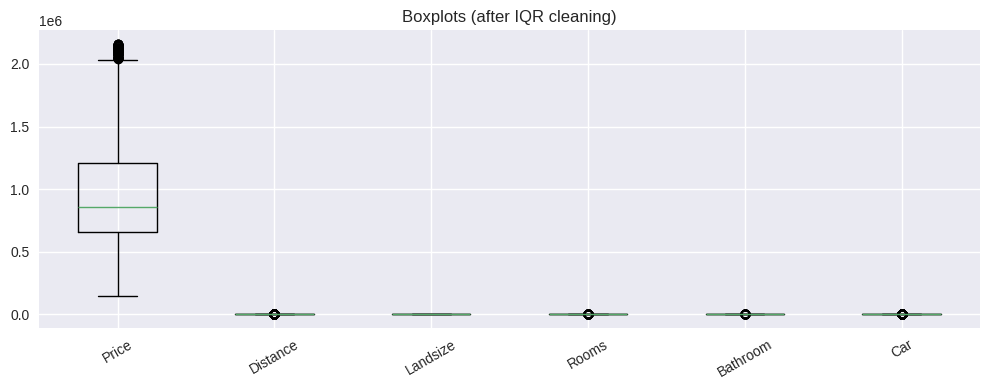

In [21]:
# Boxplots after cleaning (analysis copy)
box_cols = ["Price", "Distance", "Landsize", "Rooms", "Bathroom", "Car"]
box_df2 = df_clean[box_cols].dropna()

plt.figure(figsize=(10, 4))
plt.boxplot([box_df2[c].values for c in box_cols], labels=box_cols, showfliers=True)
plt.title("Boxplots (after IQR cleaning)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

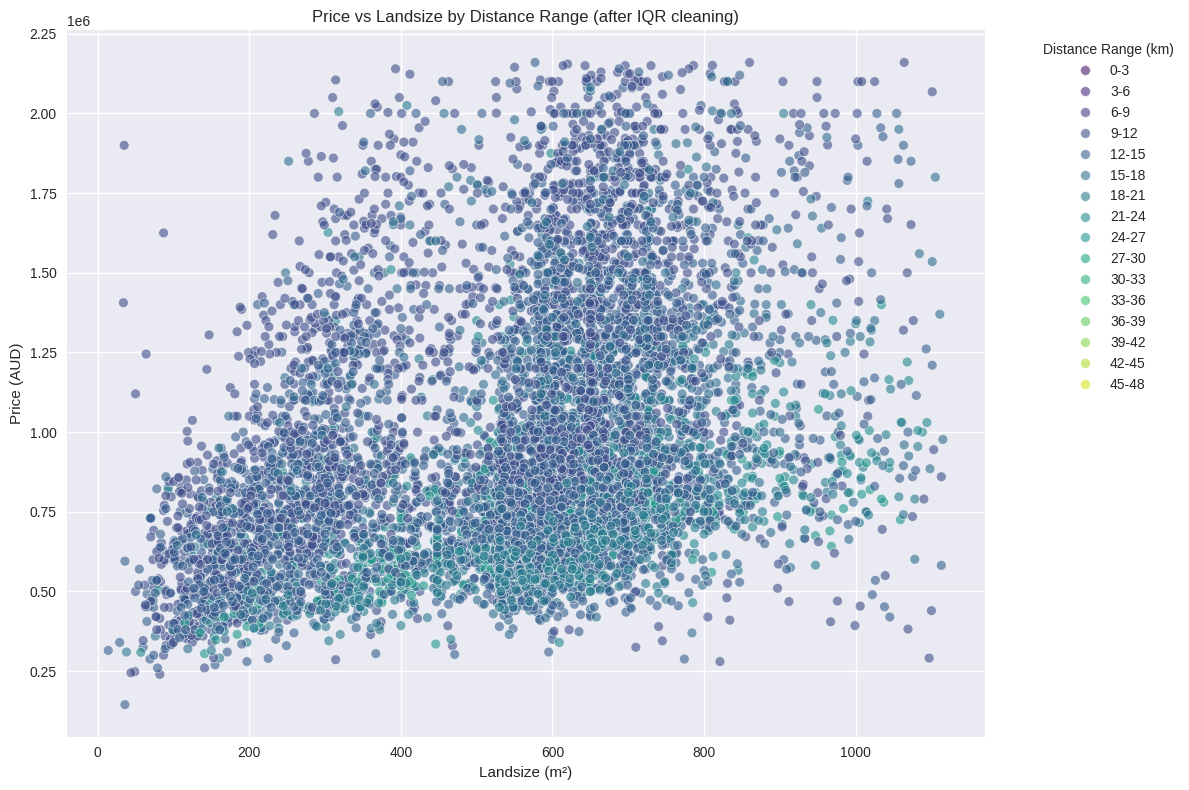

In [22]:
# Scatter after cleaning: Price vs Landsize
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean.dropna(subset=['Price', 'Landsize', 'DistanceRange']),
                x='Landsize',
                y='Price',
                hue='DistanceRange',
                palette='viridis',
                alpha=0.6,
                s=50)
plt.title('Price vs Landsize by Distance Range (after IQR cleaning)')
plt.xlabel('Landsize (m²)')
plt.ylabel('Price (AUD)')
plt.legend(title='Distance Range (km)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **MACHINE LEARNING**

Targets for ML (regression + derived classification for F1)

In [23]:
df_ml = df_clean.copy()

df_ml["LogPrice"] = np.log(df_ml["Price"])

median_price = df_ml["Price"].median()
df_ml["PriceTierHigh"] = (df_ml["Price"] >= median_price).astype(int)

median_price

855000.0

Train/Test split (single split reused across models)

In [24]:
FEATURES = NUM_FEATURES + CAT_FEATURES

X = df_ml[FEATURES].copy()
y_reg = df_ml["LogPrice"].copy()
y_cls = df_ml["PriceTierHigh"].copy()

X_train, X_test, y_reg_train, y_reg_test, y_cls_train, y_cls_test = train_test_split(
    X, y_reg, y_cls, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((6933, 7), (1734, 7))

Preprocessing

In [25]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, NUM_FEATURES),
        ("cat", categorical_transformer, CAT_FEATURES),
    ],
    remainder="drop",
)

### **ML models compare**

In [26]:
REG_MODELS = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.0005, random_state=42, max_iter=20000),
    "RandomForestRegressor": RandomForestRegressor(
        n_estimators=400, random_state=42, n_jobs=-1, min_samples_leaf=3
    ),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
}

CLS_MODELS = {
    "LogisticRegression": LogisticRegression(max_iter=3000),
    "RandomForestClassifier": RandomForestClassifier(
        n_estimators=400, random_state=42, n_jobs=-1, min_samples_leaf=3
    ),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
}

Metrics and training loop

In [27]:
def regression_metrics(y_true_log, y_pred_log) -> dict:
    r2_log = r2_score(y_true_log, y_pred_log)

    y_true = np.exp(np.asarray(y_true_log))
    y_pred = np.exp(np.asarray(y_pred_log))

    # Removed squared=False to fix TypeError with older sklearn versions
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    return {"R2_log": float(r2_log), "RMSE_AUD": float(rmse), "MAE_AUD": float(mae)}


def classification_metrics(y_true, y_pred) -> dict:
    return {"F1": float(f1_score(y_true, y_pred))}

In [28]:
reg_rows = []
for name, model in REG_MODELS.items():
    pipe = Pipeline(steps=[("preprocess", preprocess), ("model", model)])
    pipe.fit(X_train, y_reg_train)
    y_pred = pipe.predict(X_test)

    m = regression_metrics(y_reg_test, y_pred)
    m["Model"] = name
    reg_rows.append(m)

cls_rows = []
for name, model in CLS_MODELS.items():
    pipe = Pipeline(steps=[("preprocess", preprocess), ("model", model)])
    pipe.fit(X_train, y_cls_train)
    y_pred = pipe.predict(X_test)

    m = classification_metrics(y_cls_test, y_pred)
    m["Classifier"] = name
    cls_rows.append(m)

reg_table = pd.DataFrame(reg_rows).sort_values(by="R2_log", ascending=False).reset_index(drop=True)
# Ensure 'Model' is the first column
reg_table = reg_table[['Model'] + [col for col in reg_table.columns if col != 'Model']]
cls_table = pd.DataFrame(cls_rows).sort_values(by="F1", ascending=False).reset_index(drop=True)

display(reg_table, cls_table)


,Model,R2_log,RMSE_AUD,MAE_AUD
0,LinearRegression,0.821468,180088.925937,127159.895022
1,Ridge,0.797530,192322.813025,135481.938561
2,Lasso,0.745405,218151.090669,154345.354149
3,RandomForestRegressor,0.743967,215795.187072,152310.104479
4,GradientBoostingRegressor,0.617309,264398.286107,195376.881882


,F1,Classifier
0,0.879010,LogisticRegression
1,0.848929,RandomForestClassifier
2,0.817827,GradientBoostingClassifier


In [29]:
best_f1 = float(cls_table.loc[0, "F1"]) if not cls_table.empty else np.nan
best_cls = str(cls_table.loc[0, "Classifier"]) if not cls_table.empty else "—"

comparison = reg_table.copy()
comparison["Best_F1_(PriceTier)"] = best_f1
comparison["Best_Classifier"] = best_cls

# Choose best regression model: highest R2_log; tie-breaker lowest RMSE_AUD
comparison_sorted = comparison.sort_values(by=["R2_log", "RMSE_AUD"], ascending=[False, True]).reset_index(drop=True)
best_model_name = str(comparison_sorted.loc[0, "Model"])

comparison_sorted, best_model_name

(                       Model    R2_log       RMSE_AUD        MAE_AUD  \
 0           LinearRegression  0.821468  180088.925937  127159.895022   
 1                      Ridge  0.797530  192322.813025  135481.938561   
 2                      Lasso  0.745405  218151.090669  154345.354149   
 3      RandomForestRegressor  0.743967  215795.187072  152310.104479   
 4  GradientBoostingRegressor  0.617309  264398.286107  195376.881882   
 
    Best_F1_(PriceTier)     Best_Classifier  
 0              0.87901  LogisticRegression  
 1              0.87901  LogisticRegression  
 2              0.87901  LogisticRegression  
 3              0.87901  LogisticRegression  
 4              0.87901  LogisticRegression  ,
 'LinearRegression')

Fitting the best regression model and finalize

In [30]:
BEST_REG_MODEL = REG_MODELS[best_model_name]
best_pipe = Pipeline(steps=[("preprocess", preprocess), ("model", BEST_REG_MODEL)])
best_pipe.fit(X_train, y_reg_train)

y_pred_best = best_pipe.predict(X_test)
best_metrics = regression_metrics(y_reg_test, y_pred_best)

print(best_model_name)
best_metrics

LinearRegression


{'R2_log': 0.8214680740688298,
 'RMSE_AUD': 180088.92593687028,
 'MAE_AUD': 127159.8950221288}

## **FINAL SIMULATION**


Layout (Colab-friendly):
- **Left**: numeric + categorical inputs + predicted price
- **Right**: scatter plot (alpha=0.7) + trendline + predicted point (alpha=1.0, different color)

Scatter plot:
- Uses the cleaned dataset
- Shows **Price vs Landsize**
- Fits a simple linear trendline on the displayed points (np.polyfit)

In [31]:
def estimate_price(
    rooms: float,
    bathroom: float,
    car: float,
    distance: float,
    landsize: float,
    prop_type: str,
    suburb: str,
) -> float:
    x = pd.DataFrame([{
        "Rooms": rooms,
        "Bathroom": bathroom,
        "Car": car,
        "Distance": distance,
        "Landsize": landsize,
        "Type": prop_type,
        "Suburb": suburb,
    }])
    pred_log = float(best_pipe.predict(x)[0])
    return float(np.exp(pred_log))

In [32]:
# Try interactive UI (works well in Colab). Falls back gracefully if ipywidgets isn't available.
try:
    import ipywidgets as widgets
    from ipywidgets import HBox, VBox
except Exception:
    widgets = None

if widgets is None:
    print("ipywidgets not available. You can call estimate_price(...) manually.")
else:
    type_values = sorted(df_ml["Type"].dropna().astype(str).unique().tolist())
    suburb_values = sorted(df_ml["Suburb"].dropna().astype(str).unique().tolist())

    # Widgets (left)
    w_rooms = widgets.IntSlider(value=3, min=0, max=10, step=1, description="Rooms")
    w_bath = widgets.IntSlider(value=2, min=0, max=10, step=1, description="Bathroom")
    w_car = widgets.IntSlider(value=1, min=0, max=10, step=1, description="Car")

    dist_min = float(df_ml["Distance"].quantile(0.01))
    dist_max = float(df_ml["Distance"].quantile(0.99))
    land_min = float(df_ml["Landsize"].quantile(0.01))
    land_max = float(df_ml["Landsize"].quantile(0.99))

    w_distance = widgets.FloatSlider(value=12.0, min=dist_min, max=dist_max, step=0.1, description="Distance")
    w_landsize = widgets.FloatSlider(value=500.0, min=land_min, max=land_max, step=1.0, description="Landsize")

    w_type = widgets.Dropdown(options=type_values, value=(type_values[0] if type_values else "h"), description="Type")
    w_suburb = widgets.Dropdown(options=suburb_values, value=(suburb_values[0] if suburb_values else "Richmond"), description="Suburb")

    out_text = widgets.Output()
    out_plot = widgets.Output()

    def _render():
        pred = estimate_price(
            rooms=float(w_rooms.value),
            bathroom=float(w_bath.value),
            car=float(w_car.value),
            distance=float(w_distance.value),
            landsize=float(w_landsize.value),
            prop_type=str(w_type.value),
            suburb=str(w_suburb.value),
        )

        # Right plot: Price vs Landsize (filtered by Type/Suburb for relevance if possible)
        dff = df_ml.copy()
        # Filter to reduce clutter and make the trendline more meaningful
        # (Suburb might be sparse; fallback to Type-only if needed)
        d1 = dff[dff["Suburb"].astype(str) == str(w_suburb.value)].copy()
        if len(d1) >= 200:
            dff_plot = d1
        else:
            d2 = dff[dff["Type"].astype(str) == str(w_type.value)].copy()
            dff_plot = d2 if len(d2) >= 200 else dff.sample(n=min(4000, len(dff)), random_state=42)

        x = dff_plot["Landsize"].to_numpy(dtype=float)
        y = dff_plot["Price"].to_numpy(dtype=float)
        ok = np.isfinite(x) & np.isfinite(y)
        x, y = x[ok], y[ok]

        with out_text:
            out_text.clear_output()
            print(f"Best regression model: {best_model_name}")
            print(f"Estimated price (AUD): {pred:,.0f}")

        with out_plot:
            out_plot.clear_output()
            plt.figure(figsize=(7.2, 4.8))

            # Scatter points (alpha=0.7)
            plt.scatter(x, y, s=14, alpha=0.7)

            # Trendline (simple linear fit for the displayed points)
            if len(x) >= 2:
                m, b = np.polyfit(x, y, 1)
                xs = np.linspace(float(np.min(x)), float(np.max(x)), 80)
                ys = m * xs + b
                plt.plot(xs, ys, linewidth=2)

            # Predicted point (alpha=1.0, different color)
            plt.scatter([float(w_landsize.value)], [pred], s=120, alpha=1.0)

            plt.title("Price vs Landsize — scatter + trendline + predicted point")
            plt.xlabel("Landsize (m²)")
            plt.ylabel("Price (AUD)")
            plt.tight_layout()
            plt.show()

    for w in [w_rooms, w_bath, w_car, w_distance, w_landsize, w_type, w_suburb]:
        w.observe(lambda _change: _render(), names="value")

    left = VBox([w_rooms, w_bath, w_car, w_distance, w_landsize, w_type, w_suburb, out_text])
    ui = HBox([left, out_plot])
    display(ui)
    _render()